In [1]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#pickling
import pickle

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 653.7+ KB


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [7]:
train[['HomePlanet','Transported']].groupby(['HomePlanet'] , as_index=True).mean().sort_values(by='Transported',ascending=False)

,Transported
HomePlanet,
Europa,0.658846
Mars,0.523024
Earth,0.423946


In [8]:
train[['HomePlanet','Transported']].groupby(['HomePlanet'] , as_index=True).count().sort_values(by='Transported',ascending=False)

,Transported
HomePlanet,
Earth,4602
Europa,2131
Mars,1759


In [9]:
train[['CryoSleep','Transported']].groupby(['CryoSleep'] , as_index=True).mean().sort_values(by='Transported',ascending=False)

,Transported
CryoSleep,
True,0.817583
False,0.328921


In [10]:
train[['CryoSleep','Transported']].groupby(['CryoSleep'] , as_index=True).count().sort_values(by='Transported',ascending=False)

,Transported
CryoSleep,
False,5439
True,3037


In [11]:
train[['Destination','Transported']].groupby(['Destination'] , as_index=True).mean().sort_values(by='Transported',ascending=False)

,Transported
Destination,
55 Cancri e,0.610000
PSO J318.5-22,0.503769
TRAPPIST-1e,0.471175


In [12]:
train[['Destination','Transported']].groupby(['Destination'] , as_index=True).count().sort_values(by='Transported',ascending=False)

,Transported
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796


In [13]:
train[['VIP','Transported']].groupby(['VIP'] , as_index=True).mean().sort_values(by='Transported',ascending=False)

,Transported
VIP,
False,0.506332
True,0.381910


In [14]:
train[['VIP','Transported']].groupby(['VIP'] , as_index=True).count().sort_values(by='Transported',ascending=False)

,Transported
VIP,
False,8291
True,199


In [15]:
train[['HomePlanet','Destination','Transported']].groupby(['HomePlanet','Destination'] , as_index=True).mean().sort_values(by='Transported',ascending=False)

Transported
HomePlanet Destination               
Europa     PSO J318.5-22     0.736842
           55 Cancri e       0.689616
           TRAPPIST-1e       0.634987
Mars       55 Cancri e       0.611399
           TRAPPIST-1e       0.511864
Earth      55 Cancri e       0.504348
           PSO J318.5-22     0.498596
Mars       PSO J318.5-22     0.448980
Earth      TRAPPIST-1e       0.389229

In [16]:
train[['HomePlanet','VIP','Transported']].groupby(['HomePlanet','VIP'] , as_index=True).mean().sort_values(by='Transported',ascending=False)

,,Transported
HomePlanet,VIP,
Europa,False,0.670072
Mars,False,0.534180
Europa,True,0.488550
Earth,False,0.424337
Mars,True,0.158730


In [17]:
train[['HomePlanet','Destination','Transported']].groupby(['HomePlanet','Destination'] , as_index=True).count().sort_values(by='Transported',ascending=False)

Transported
HomePlanet Destination               
Earth      TRAPPIST-1e           3101
Mars       TRAPPIST-1e           1475
Europa     TRAPPIST-1e           1189
           55 Cancri e            886
Earth      PSO J318.5-22          712
           55 Cancri e            690
Mars       55 Cancri e            193
           PSO J318.5-22           49
Europa     PSO J318.5-22           19

<AxesSubplot: xlabel='Age', ylabel='Transported'>

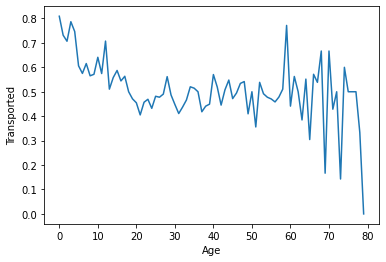

In [18]:
age = train[['Age','Transported']].groupby(['Age'] , as_index=True).mean().sort_values(by='Transported',ascending=False)
sns.lineplot(data=age ,x='Age',y='Transported')

<AxesSubplot: xlabel='RoomService', ylabel='Transported'>

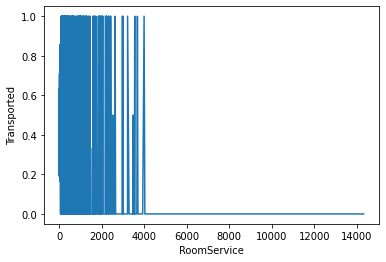

In [19]:
roomService = train[['RoomService','Transported']].groupby(['RoomService'] , as_index=True).mean().sort_values(by='Transported',ascending=False)
sns.lineplot(data=roomService ,x='RoomService',y='Transported')

<AxesSubplot: xlabel='FoodCourt', ylabel='Transported'>

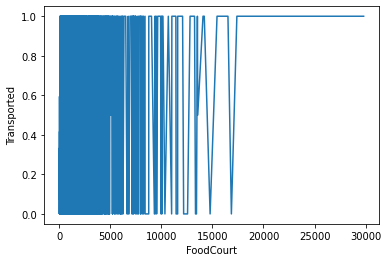

In [20]:
foodCourt = train[['FoodCourt','Transported']].groupby(['FoodCourt'] , as_index=True).mean().sort_values(by='Transported',ascending=False)
sns.lineplot(data=foodCourt ,x='FoodCourt',y='Transported')

<AxesSubplot: xlabel='ShoppingMall', ylabel='Transported'>

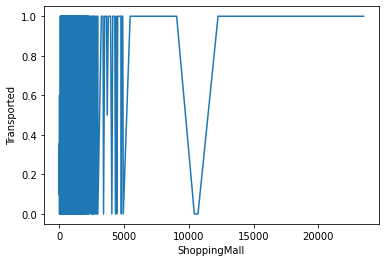

In [21]:
shoppingMall = train[['ShoppingMall','Transported']].groupby(['ShoppingMall'] , as_index=True).mean().sort_values(by='Transported',ascending=False)
sns.lineplot(data=shoppingMall ,x='ShoppingMall',y='Transported')

<AxesSubplot: xlabel='Spa', ylabel='Transported'>

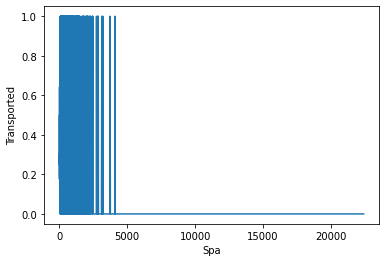

In [22]:
spa = train[['Spa','Transported']].groupby(['Spa'] , as_index=True).mean().sort_values(by='Transported',ascending=False)
sns.lineplot(data=spa ,x='Spa',y='Transported')

<AxesSubplot: xlabel='VRDeck', ylabel='Transported'>

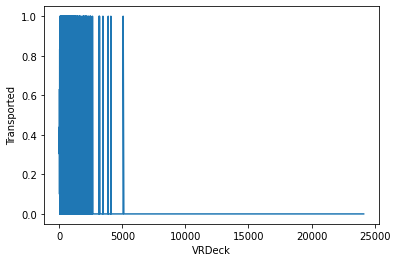

In [23]:
vRDeck = train[['VRDeck','Transported']].groupby(['VRDeck'] , as_index=True).mean().sort_values(by='Transported',ascending=False)
sns.lineplot(data=vRDeck ,x='VRDeck',y='Transported')

In [24]:
train[['Deck','Num','Side']] = train['Cabin'].str.split("/",expand=True)
test[['Deck','Num','Side']] = test['Cabin'].str.split("/",expand=True)


In [25]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
combine = [train,test]

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Deck          8494 non-null   object 
 14  Num           8494 non-null   object 
 15  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 721.6+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
 12  Deck          4177 non-null   object 
 13  Num           4177 non-null   object 
 14  Side          4177 non-null   object 
dtypes: float64(6), object(9)
memory usage: 350.9+ KB


In [28]:
train[['Deck','Transported']].groupby(['Deck'] , as_index=True).mean().sort_values(by='Transported',ascending=False)

,Transported
Deck,
B,0.734275
C,0.680054
G,0.516217
A,0.496094
F,0.439871
D,0.433054
E,0.357306
T,0.200000


In [29]:
train[['Deck','Transported']].groupby(['Deck'] , as_index=True).count().sort_values(by='Transported',ascending=False)

,Transported
Deck,
F,2794
G,2559
E,876
B,779
C,747
D,478
A,256
T,5


In [30]:
train[['Side','Transported']].groupby(['Side'] , as_index=True).mean().sort_values(by='Transported',ascending=False)

,Transported
Side,
S,0.555037
P,0.451260


In [31]:
train[['Side','Transported']].groupby(['Side'] , as_index=True).count().sort_values(by='Transported',ascending=False)

,Transported
Side,
S,4288
P,4206


<AxesSubplot: xlabel='Num', ylabel='Transported'>

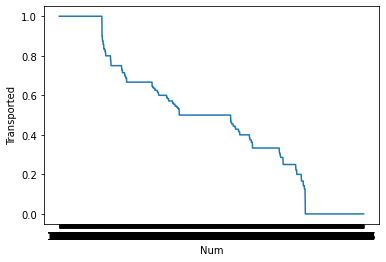

In [32]:
num = train[['Num','Transported']].groupby(['Num'] , as_index=True).mean().sort_values(by='Transported',ascending=False)
sns.lineplot(data=num ,x='Num',y='Transported')

In [33]:
for i in combine:
    i['CategoricalAge'] = pd.qcut(train['Age'],15)
categoricalage = train[['CategoricalAge','Transported']].groupby(['CategoricalAge'] , as_index=True).mean()
categoricalage

,Transported
CategoricalAge,
"(-0.001, 7.0]",0.732657
"(7.0, 15.0]",0.571649
"(15.0, 18.0]",0.526400
"(18.0, 20.0]",0.463158
"(20.0, 22.0]",0.430233
"(22.0, 24.0]",0.449675
"(24.0, 26.0]",0.479452
"(26.0, 28.0]",0.526616
"(28.0, 31.0]",0.450407


<AxesSubplot: >

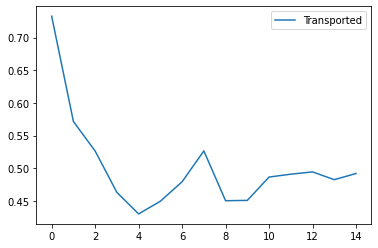

In [34]:
categoricalage = train[['CategoricalAge','Transported']].groupby(['CategoricalAge'] , as_index=False).mean()
sns.lineplot(data=categoricalage)

In [35]:
for i in combine:
    i['IsKid'] = 0
    i.loc[i['Age'] <= 7 , 'IsKid'] = 1
train[['IsKid','Transported']].groupby(['IsKid'] , as_index=False).mean()

,IsKid,Transported
0,0,0.486917
1,1,0.732657


In [36]:
for i in combine:
    i.loc[i['RoomService'].isnull(), 'RoomService'] = 0
    i.loc[i['FoodCourt'].isnull(), 'FoodCourt'] = 0
    i.loc[i['ShoppingMall'].isnull(), 'ShoppingMall'] = 0
    i.loc[i['Spa'].isnull(), 'Spa'] = 0
    i.loc[i['VRDeck'].isnull(), 'VRDeck'] = 0
    i.loc[i['CryoSleep'].isnull(), 'CryoSleep'] = True
    i.loc[i['HomePlanet'].isnull(), 'HomePlanet'] = 'Earth' 
    i.loc[i['Destination'].isnull(), 'Destination'] = 'TRAPPIST-1e' 	
    i.loc[i['Deck'].isnull(), 'Deck'] = 'F'
    i.loc[i['Side'].isnull(), 'Side'] = 'S'
    i.loc[i['Num'].isnull(), 'Num'] = 0
    



#train[['HasCabin','Survived']].groupby(['HasCabin'] , as_index=True).mean()

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     8693 non-null   object  
 1   HomePlanet      8693 non-null   object  
 2   CryoSleep       8693 non-null   object  
 3   Destination     8693 non-null   object  
 4   Age             8514 non-null   float64 
 5   VIP             8490 non-null   object  
 6   RoomService     8693 non-null   float64 
 7   FoodCourt       8693 non-null   float64 
 8   ShoppingMall    8693 non-null   float64 
 9   Spa             8693 non-null   float64 
 10  VRDeck          8693 non-null   float64 
 11  Name            8493 non-null   object  
 12  Transported     8693 non-null   bool    
 13  Deck            8693 non-null   object  
 14  Num             8693 non-null   object  
 15  Side            8693 non-null   object  
 16  CategoricalAge  8514 non-null   category
 17  IsKid         

In [38]:
train[['Deck','PassengerId']].groupby(['Deck'],as_index=True).count()

,PassengerId
Deck,
A,256
B,779
C,747
D,478
E,876
F,2993
G,2559
T,5


In [39]:
train[['Side','PassengerId']].groupby(['Side'],as_index=True).count()

,PassengerId
Side,
P,4206
S,4487


In [40]:
for i in combine:
    i['IsVIP'] = 0
    i.loc[i['VIP'] == True , 'IsVIP'] = 1



In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     8693 non-null   object  
 1   HomePlanet      8693 non-null   object  
 2   CryoSleep       8693 non-null   object  
 3   Destination     8693 non-null   object  
 4   Age             8514 non-null   float64 
 5   VIP             8490 non-null   object  
 6   RoomService     8693 non-null   float64 
 7   FoodCourt       8693 non-null   float64 
 8   ShoppingMall    8693 non-null   float64 
 9   Spa             8693 non-null   float64 
 10  VRDeck          8693 non-null   float64 
 11  Name            8493 non-null   object  
 12  Transported     8693 non-null   bool    
 13  Deck            8693 non-null   object  
 14  Num             8693 non-null   object  
 15  Side            8693 non-null   object  
 16  CategoricalAge  8514 non-null   category
 17  IsKid         

In [42]:
train[['IsVIP','PassengerId']].groupby(['IsVIP'],as_index=True).count()

,PassengerId
IsVIP,
0,8494
1,199


In [43]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     8693 non-null   object  
 1   HomePlanet      8693 non-null   object  
 2   CryoSleep       8693 non-null   object  
 3   Destination     8693 non-null   object  
 4   Age             8514 non-null   float64 
 5   VIP             8490 non-null   object  
 6   RoomService     8693 non-null   float64 
 7   FoodCourt       8693 non-null   float64 
 8   ShoppingMall    8693 non-null   float64 
 9   Spa             8693 non-null   float64 
 10  VRDeck          8693 non-null   float64 
 11  Name            8493 non-null   object  
 12  Transported     8693 non-null   bool    
 13  Deck            8693 non-null   object  
 14  Num             8693 non-null   object  
 15  Side            8693 non-null   object  
 16  CategoricalAge  8514 non-null   category
 17  IsKid         

In [44]:
train = train.drop(['Name', 'Age','VIP'], axis=1)
test = test.drop(['Name','Age','VIP'], axis=1)
combine = [train, test]
train.shape, test.shape

((8693, 16), (4277, 15))

In [45]:
train = train.drop(['PassengerId'], axis=1)
train.shape

(8693, 15)

In [46]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HomePlanet      8693 non-null   object  
 1   CryoSleep       8693 non-null   object  
 2   Destination     8693 non-null   object  
 3   RoomService     8693 non-null   float64 
 4   FoodCourt       8693 non-null   float64 
 5   ShoppingMall    8693 non-null   float64 
 6   Spa             8693 non-null   float64 
 7   VRDeck          8693 non-null   float64 
 8   Transported     8693 non-null   bool    
 9   Deck            8693 non-null   object  
 10  Num             8693 non-null   object  
 11  Side            8693 non-null   object  
 12  CategoricalAge  8514 non-null   category
 13  IsKid           8693 non-null   int64   
 14  IsVIP           8693 non-null   int64   
dtypes: bool(1), category(1), float64(5), int64(2), object(6)
memory usage: 696.8+ KB


In [47]:
train.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,CategoricalAge,IsKid,IsVIP
0,Europa,False,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,False,B,0,P,"(37.0, 41.0]",0,0
1,Earth,False,TRAPPIST-1e,109.0,9.0,25.0,549.0,44.0,True,F,0,S,"(22.0, 24.0]",0,0
2,Europa,False,TRAPPIST-1e,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,"(53.0, 79.0]",0,1
3,Europa,False,TRAPPIST-1e,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,"(31.0, 33.0]",0,0
4,Earth,False,TRAPPIST-1e,303.0,70.0,151.0,565.0,2.0,True,F,1,S,"(15.0, 18.0]",0,0


In [48]:
def newpd(x):
    if x == 'Earth':
        return 1
    elif x == 'Europa':
        return 2
    else:
        return 3

train['HomePlanet'] = train['HomePlanet'].apply(newpd)
test['HomePlanet'] = test['HomePlanet'].apply(newpd)



In [49]:
train.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,CategoricalAge,IsKid,IsVIP
0,2,False,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,False,B,0,P,"(37.0, 41.0]",0,0
1,1,False,TRAPPIST-1e,109.0,9.0,25.0,549.0,44.0,True,F,0,S,"(22.0, 24.0]",0,0
2,2,False,TRAPPIST-1e,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,"(53.0, 79.0]",0,1
3,2,False,TRAPPIST-1e,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,"(31.0, 33.0]",0,0
4,1,False,TRAPPIST-1e,303.0,70.0,151.0,565.0,2.0,True,F,1,S,"(15.0, 18.0]",0,0


In [50]:
def newpd2(x):
    if x == 'TRAPPIST-1e':
        return 1
    elif x == '55 Cancri e':
        return 2
    else:
        return 3

train['Destination'] = train['Destination'].apply(newpd2)
test['Destination'] = test['Destination'].apply(newpd2)




In [51]:
train.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,CategoricalAge,IsKid,IsVIP
0,2,False,1,0.0,0.0,0.0,0.0,0.0,False,B,0,P,"(37.0, 41.0]",0,0
1,1,False,1,109.0,9.0,25.0,549.0,44.0,True,F,0,S,"(22.0, 24.0]",0,0
2,2,False,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,"(53.0, 79.0]",0,1
3,2,False,1,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,"(31.0, 33.0]",0,0
4,1,False,1,303.0,70.0,151.0,565.0,2.0,True,F,1,S,"(15.0, 18.0]",0,0


In [52]:
def newpd3(x):
    if x == False:
        return 0
    else:
        return 1

train['CryoSleep'] = train['CryoSleep'].apply(newpd3)
test['CryoSleep'] = test['CryoSleep'].apply(newpd3)

In [53]:
'''def newpd4(x):
    if x == False:
        return 0
    else:
        return 1

train['Transported'] = train['Transported'].apply(newpd4)
test['Transported'] = test['Transported'].apply(newpd4)'''
train.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,CategoricalAge,IsKid,IsVIP
0,2,0,1,0.0,0.0,0.0,0.0,0.0,False,B,0,P,"(37.0, 41.0]",0,0
1,1,0,1,109.0,9.0,25.0,549.0,44.0,True,F,0,S,"(22.0, 24.0]",0,0
2,2,0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,"(53.0, 79.0]",0,1
3,2,0,1,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,"(31.0, 33.0]",0,0
4,1,0,1,303.0,70.0,151.0,565.0,2.0,True,F,1,S,"(15.0, 18.0]",0,0


In [54]:
def newpd5(x):
    if x == 'A':
        return 0
    elif x == 'B':
        return 1
    elif x == 'C':
        return 2
    elif x == 'D':
        return 3
    elif x == 'E':
        return 4
    elif x == 'F':
        return 5
    elif x == 'G':
        return 6
    else:
        return 7

train['Deck'] = train['Deck'].apply(newpd5)
test['Deck'] = test['Deck'].apply(newpd5)
train.head()


,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,CategoricalAge,IsKid,IsVIP
0,2,0,1,0.0,0.0,0.0,0.0,0.0,False,1,0,P,"(37.0, 41.0]",0,0
1,1,0,1,109.0,9.0,25.0,549.0,44.0,True,5,0,S,"(22.0, 24.0]",0,0
2,2,0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,S,"(53.0, 79.0]",0,1
3,2,0,1,0.0,1283.0,371.0,3329.0,193.0,False,0,0,S,"(31.0, 33.0]",0,0
4,1,0,1,303.0,70.0,151.0,565.0,2.0,True,5,1,S,"(15.0, 18.0]",0,0


In [55]:
def newpd6(x):
    if x == 'P':
        return 0
    else:
        return 1

train['Side'] = train['Side'].apply(newpd6)
test['Side'] = test['Side'].apply(newpd6)
train.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,CategoricalAge,IsKid,IsVIP
0,2,0,1,0.0,0.0,0.0,0.0,0.0,False,1,0,0,"(37.0, 41.0]",0,0
1,1,0,1,109.0,9.0,25.0,549.0,44.0,True,5,0,1,"(22.0, 24.0]",0,0
2,2,0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,"(53.0, 79.0]",0,1
3,2,0,1,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,"(31.0, 33.0]",0,0
4,1,0,1,303.0,70.0,151.0,565.0,2.0,True,5,1,1,"(15.0, 18.0]",0,0


In [56]:
train = train.drop(['CategoricalAge'], axis=1)
test = test.drop(['CategoricalAge'], axis=1)
combine = [train, test]
train.shape, test.shape

((8693, 14), (4277, 14))

In [57]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   RoomService   8693 non-null   float64
 4   FoodCourt     8693 non-null   float64
 5   ShoppingMall  8693 non-null   float64
 6   Spa           8693 non-null   float64
 7   VRDeck        8693 non-null   float64
 8   Transported   8693 non-null   bool   
 9   Deck          8693 non-null   int64  
 10  Num           8693 non-null   object 
 11  Side          8693 non-null   int64  
 12  IsKid         8693 non-null   int64  
 13  IsVIP         8693 non-null   int64  
dtypes: bool(1), float64(5), int64(7), object(1)
memory usage: 857.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Nu

In [58]:
for i in combine:
    i['LuxuryAmenitiess'] = i['RoomService']  + i['FoodCourt'] + i['ShoppingMall'] +i['Spa'] +i['VRDeck'] 

In [59]:
train = train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1)
test = test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1)
combine = [train,test]

In [60]:
X_train = train.drop('Transported',axis=1)
Y_train = train['Transported']
X_test = test.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((8693, 9), (8693,), (4277, 9))

In [61]:
train.head()

,HomePlanet,CryoSleep,Destination,Transported,Deck,Num,Side,IsKid,IsVIP,LuxuryAmenitiess
0,2,0,1,False,1,0,0,0,0,0.0
1,1,0,1,True,5,0,1,0,0,736.0
2,2,0,1,False,0,0,1,0,1,10383.0
3,2,0,1,False,0,0,1,0,0,5176.0
4,1,0,1,True,5,1,1,0,0,1091.0


In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\Users\aravind\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


72.28

In [63]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Destination,1.809354
5,Side,0.495571
6,IsKid,0.468585
0,CryoSleep,0.067514
2,Transported,0.056038
4,Num,0.000283
8,LuxuryAmenitiess,-0.000116
7,IsVIP,-0.076652
3,Deck,-0.287621


In [64]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

73.43

In [65]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.0

In [66]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.91

In [67]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

55.47

In [68]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\Users\aravind\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


62.65

In [69]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

57.39

In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.24

In [71]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.23

In [72]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,99.24
3,Random Forest,99.23
1,KNN,82.00
0,Support Vector Machines,73.43
4,Naive Bayes,72.91
2,Logistic Regression,72.28
7,Linear SVC,62.65
6,Stochastic Gradient Decent,57.39
5,Perceptron,55.47


In [73]:
output = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": Y_pred
    })

output.to_csv('submission.csv', index=False)

In [74]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
pickle.dump(random_forest , open('model.pkl','wb'))
